# Гармоніки

Як відомо з математики, будь-який періодичний сигнал можна представити як суму сінусоідальних сигналів (гармонік). Період першої з них дорівнює періоду сигналу, а періоди наступних є кратними до нього.

## Трикутний сигнал

Створимо трикутний сигнал з основною частотою 200 Hz, розрахуємо його вейв довжиною 3 періоди і побудуємо його

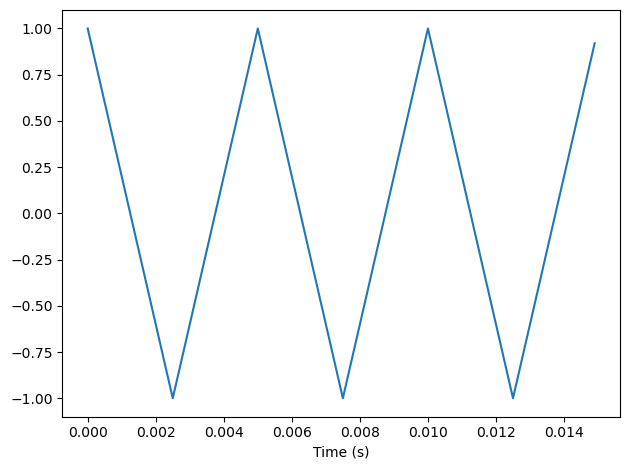

In [20]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(freq=200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Створимо вейв довжиною 0,5 с і прослухаємо його

In [21]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Тепер розрахуємо амплітуди гармонік трикутного сигналу відповдно до його аналітичного розкладання в ряд Фур'є. Будемо посліднвно додавати гармоніки і спостерігати, як змінюється зовнішній виглад суми гармонік.

In [22]:
from thinkdsp import SinSignal

freq_1 = 200
amp_1 = 8*3.141592653**2
harm_1 = SinSignal(freq=freq_1, amp=amp_1, offset=0)

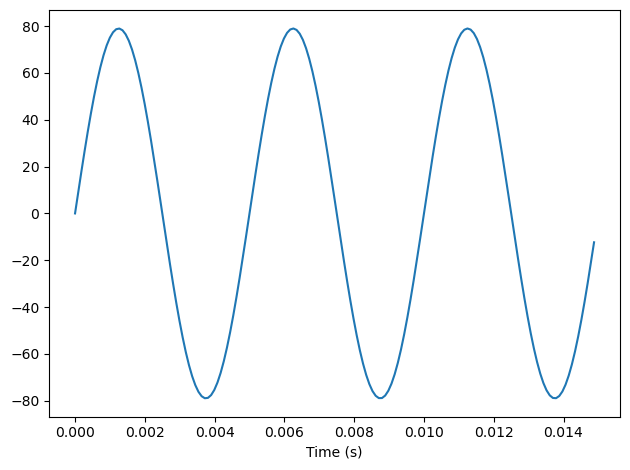

In [23]:
from thinkdsp import decorate

harm_1.plot()
decorate(xlabel='Time (s)')

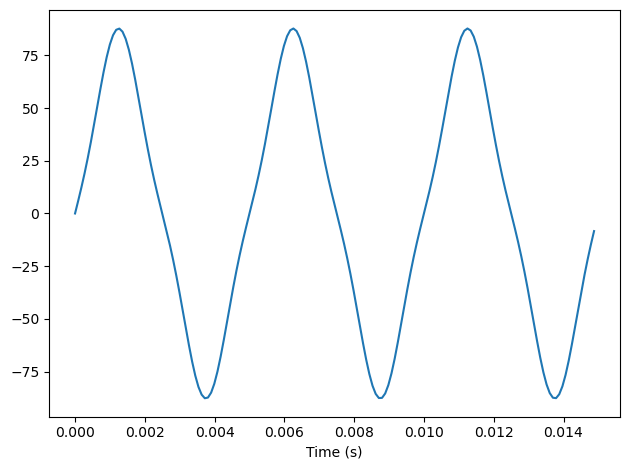

In [24]:
# В розкладанні трикутного сигналу присутні лише непарні гармоніки: 1, 3, 5, 7, ...
freq_3 = freq_1 * 3
amp_3 = -amp_1 / 9  # Амплітуди зменшуються пропорційно до квадрату номера гармоніки
harm_3 = SinSignal(freq=freq_3, amp=amp_3, offset=0)

sum_3 = harm_1 + harm_3
sum_3.plot()
decorate(xlabel='Time (s)')

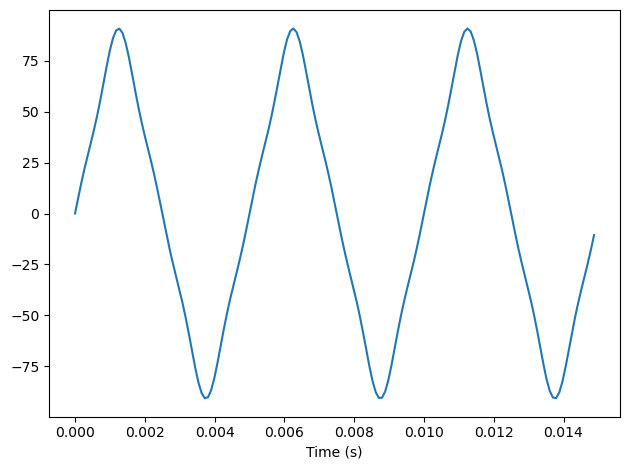

In [25]:
freq_5 = freq_1 * 5
amp_5 = amp_1 / 25
harm_5 = SinSignal(freq=freq_5, amp=amp_5, offset=0)

sum_5 = sum_3 + harm_5
sum_5.plot()
decorate(xlabel='Time (s)')

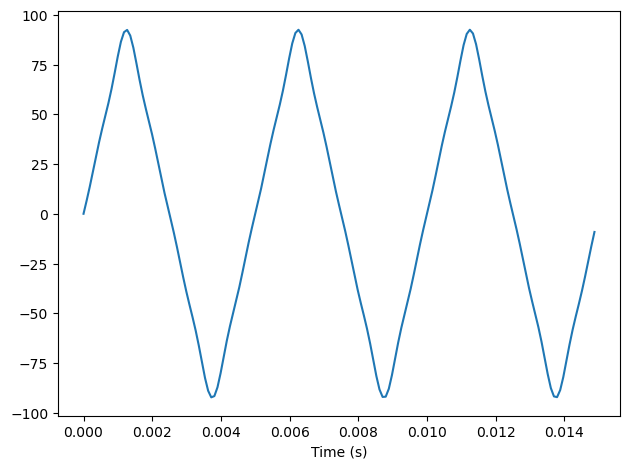

In [26]:
freq_7 = freq_1 * 7
amp_7 = -amp_1 / 49
harm_7 = SinSignal(freq=freq_7, amp=amp_7, offset=0)

sum_7 = sum_5 + harm_7
sum_7.plot()
decorate(xlabel='Time (s)')

Як бачимо, після додавання буквально декількох перших гармонік форма сумарного сигналу досить швидко наближається до трикутної.

Тепер повернимось до трикутного сигналу, що ми утворили методами thinkdsp.
Розрахуємо його спектр

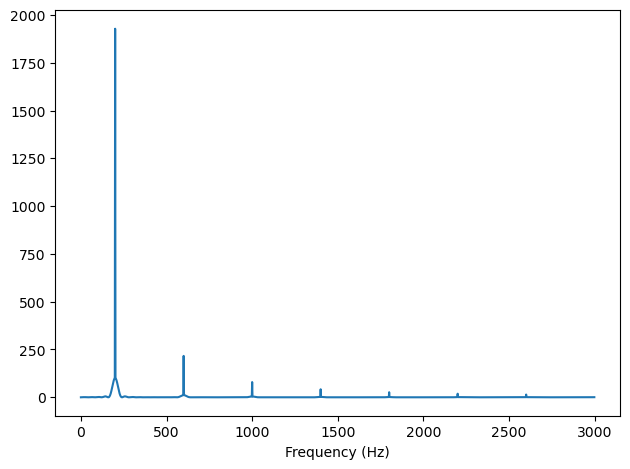

In [27]:
spectrum = wave.make_spectrum()
spectrum.plot(high=3000)
decorate(xlabel='Frequency (Hz)')

Як і показує аналітичне обчислення коефіцієнтів ряду Фур'є для трикутного сигналу, в спектрі присутні лише непарні гармоніки (f_1 = 200 Hz; f_3 = 600 Hz; f_5 = 1000 Hz і т.д.). Амплітуда гармонік спадає пропорційно до квадрату номера гармоніки.

# Прямокутний сигнал
Аналогічно, утворимо прямокутний сигнал та побудуємо 3 його періоди

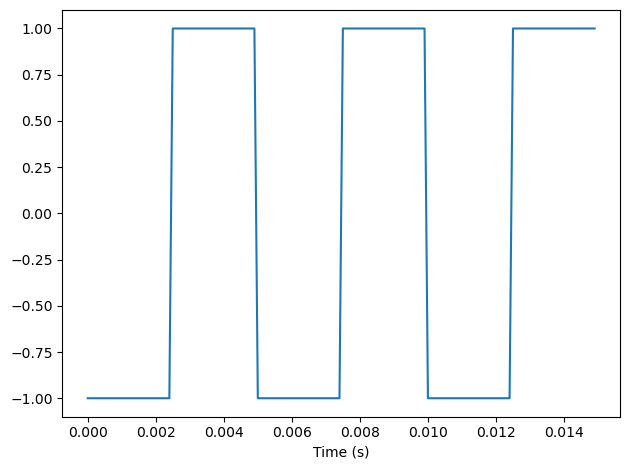

In [28]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Утворимо вейв довжиною 0,5 с та прослухаємо його

In [29]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Розрахуємо його спектр

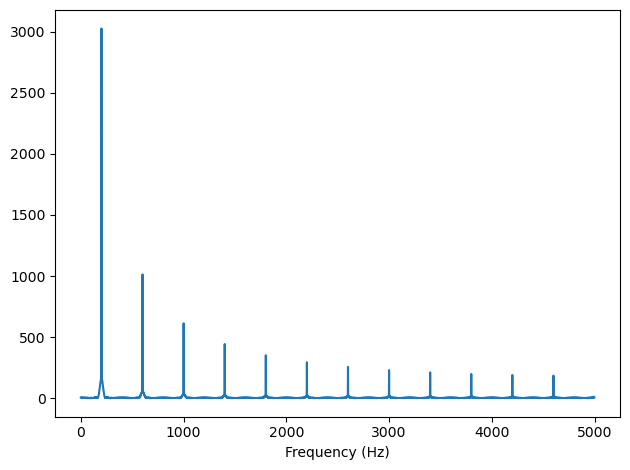

In [30]:
spectrum = wave.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

І знову в спектрі присутні лише непарні гармоніки внаслідок непарності функції, що утворює сигнал. Але амплітуда гармонік тепер зменшується повільніше у порівнянні із трикутним сигналом

## Пилкоподібний сигнал
І аналогічно, створимо пилкоподібний сигнал

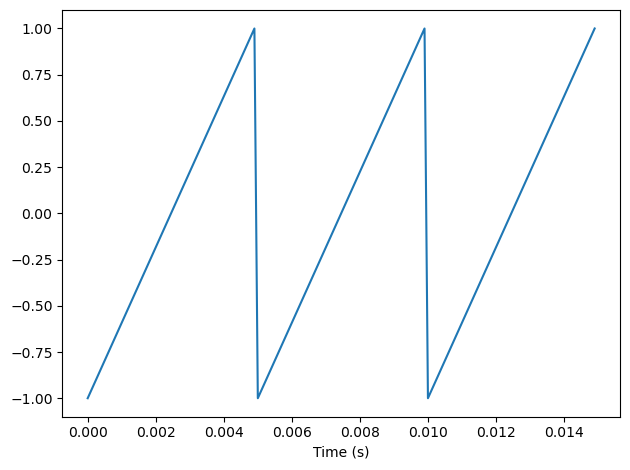

In [31]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Утворимо та прослухаємо вейв

In [32]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Розрахуємо спектр

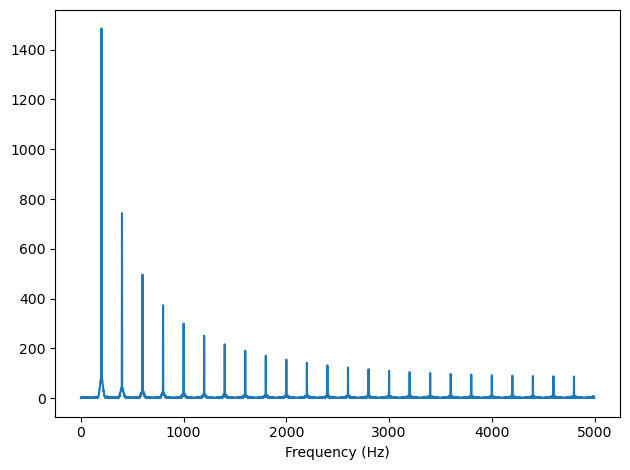

In [33]:
spectrum = wave.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

Як бачимо, в спектрі пилкоподібного сигналу присутні як парні, так і непарні гармоніки, бо функція, що задає форму сигналу є функцією загального вигляду (ані парною, ані непарною)

# Aliasing (спотворення частот)

Створимо косинусний сигнал частотою 4500 Hz, утворимо вейв із частотою дискретизації 10 kHz і побудуємо 5 періодів.

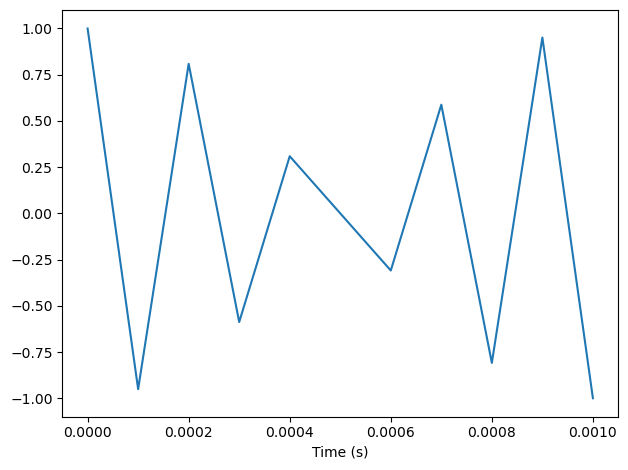

In [34]:
from thinkdsp import CosSignal

signal = CosSignal(freq=4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Як бачимо, форма косинусного сигналу виглядає сильно спотвореною. Це тому, що за частоти дискретизації 10000 точок на секунду і частоті сигналу 4500 Hz на кожен період припадає не більше двох точок. Тим не менш, спробуємо розрахувати спектр

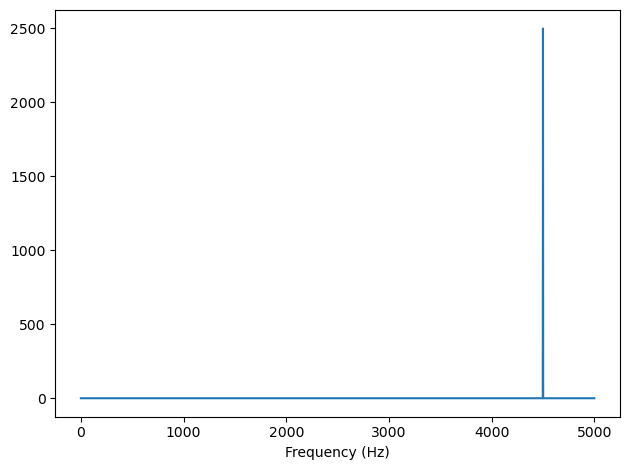

In [35]:
segment = signal.make_wave(0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Як бачимо, попри сильне спотворення вейву через грубу дискретизацію, спектр розраховано вірно: єдина гармоніка із частотою 4500 Hz

Тепер створимо косинусний сигнал частотою 5500 Hz, розрахуємо вейв і побудуємо його

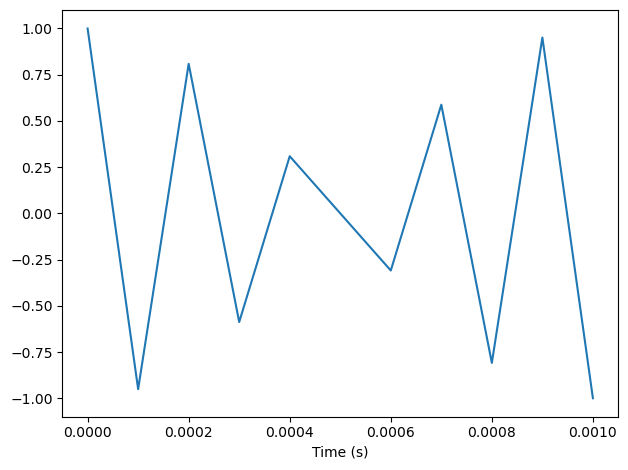

In [36]:
signal = CosSignal(freq=5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Цікаво відмітити, що ця ламана в точності відтворює ламану для попереднього сигнала 4500 Hz

Розрахуємо спектр...

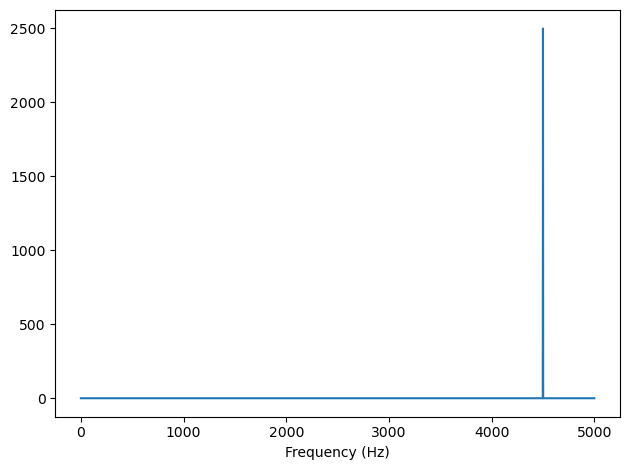

In [37]:
duration = 0.5
segment = signal.make_wave(duration, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot(10000)
decorate(xlabel='Frequency (Hz)')

...і бачимо, що в спектрі присутня єдина хибна частота 4500 Hz замість правильної 5500 Hz.
Це і є ефект спотворення частот, що перевищують так звану частоту Найквіста f_N = framerate / 2.

Аналогічно і в спектрі трикутного сигналу всі гармоніки вище 5000 Hz з'являються в спотвореному вигляді на хибних частотах 4500, 2300 і навіть 100 Hz

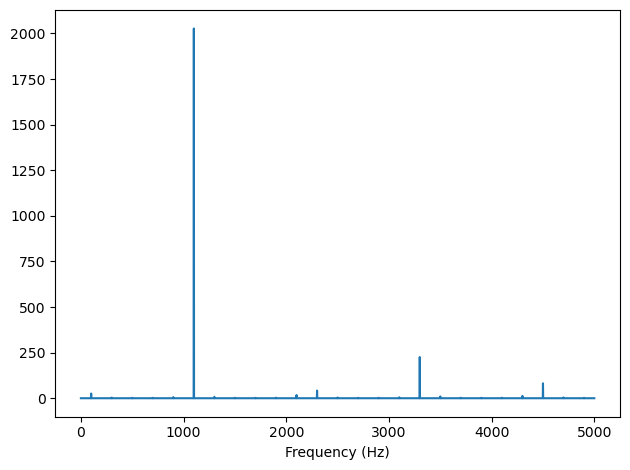

In [38]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Завдання: змінюйте величину framerate при створенні сигналів і спостерігайте, як це впливає на появу і зникнення спотворених частот